 <h1 align="center">Simple Linear Regression</h1>

<h2>1.Simple Linear Regression using sklearn</h2>

<h3 >Import the relevant libraries</h3>

In [1]:
import numpy as np
import pandas as pd

### Import the dataset

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Declare the dependent and the independent variables

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Split the data into training set and test set

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
X_train.shape

(24, 1)

### Training the Linear Regression model on the Training set

In [7]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

### Visualising the Training set results

Text(0, 0.5, 'Salary(in lpa)')

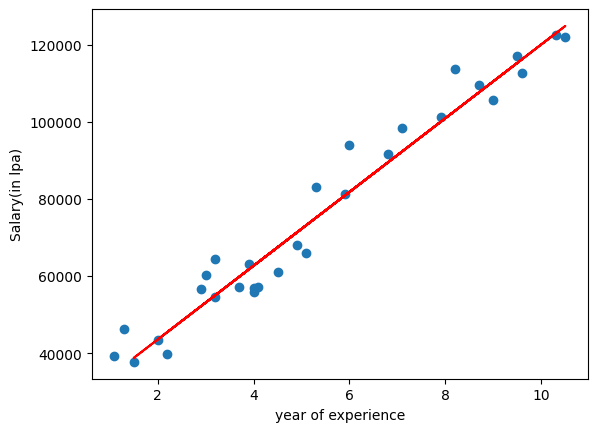

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(X_train,linear_reg.predict(X_train),color='red')
plt.xlabel('year of experience')
plt.ylabel('Salary(in lpa)')

### Finding the intercept 

In [9]:
linear_reg.intercept_

24393.16915194835

### Finding the coefficient

In [10]:
linear_reg.coef_

array([9569.58688543])

In [11]:
X_test

array([[1.3],
       [1.1],
       [4.5],
       [3.7],
       [7.1],
       [6. ]])

### Predicting the results for a test value

In [12]:
linear_reg.predict([[X_test[0][0]]])

array([36833.63210301])

<h2>2.Code from Scratch using OLS (Ordinary Least Squares)</h2>

### Creating our own class to find Slope and Intercept and Predict the model

In [13]:
class ScratchLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        print(X_test)
        
        return self.m * X_test + self.b

### Training the Simple Linear Regression model on the Training set

In [14]:
linear_reg2=ScratchLR()
linear_reg2.fit(X_train,y_train)

[9569.58688543]
[24393.16915195]


### Visualising the Training set results

[[ 8.2]
 [ 3. ]
 [ 2. ]
 [ 6.8]
 [ 2.9]
 [ 9.6]
 [ 4. ]
 [ 2.2]
 [ 3.9]
 [ 5.1]
 [10.3]
 [ 9. ]
 [ 5.3]
 [ 1.5]
 [ 3.2]
 [ 9.5]
 [ 8.7]
 [ 5.9]
 [ 4. ]
 [ 7.9]
 [10.5]
 [ 4.1]
 [ 4.9]
 [ 3.2]]


Text(0, 0.5, 'Salary(in lpa)')

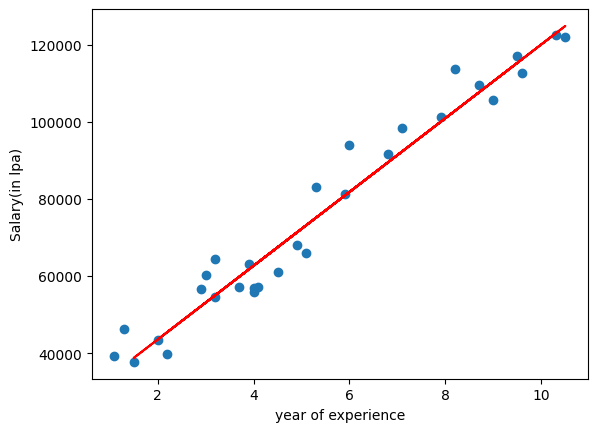

In [15]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(X_train,linear_reg2.predict(X_train),color='red')
plt.xlabel('year of experience')
plt.ylabel('Salary(in lpa)')

<h2>3.Code from Scratch using Gradient Descent</h2>

### Creating our own class to find Slope and Intercept and Predict the model

In [16]:
class ScratchGD:
    
    def __init__(self,learning_rate,epochs):
        self.m = 13800
        self.b = 25000
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calculate b and m using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

### Training the Simple Linear Regression model on the Training set

In [17]:
gd = ScratchGD(0.0001,50)
gd.fit(X_train,y_train)

9569.109807433098 24397.09722208779


<h4>Conclusion:Implemented Simple Linear Regression using scikit learn, Closed form solution using OLS and Gradient Descent.Got the same values for slope and intercept while implementing Algorithm using both library and our own class.This demonstrates that we exactly implemented sklearn by doing Code from Scratch. Try different epochs and learning rate for Gradient Descent to get better results.</h4>

<h1 align="center">Multiple Linear Regression</h1>

## 1.Multiple Linear Regression using scikit learn

### Load the dataset

In [18]:
df = pd.read_csv('housing.csv',names=['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE', 'DIS','RAD','TAX','PTRATIO','B','LSTAT', 'MEDV'], delim_whitespace=True)
X = df.iloc[:, 0:13]
y = df.iloc[:, -1]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Split the data into training set and test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [20]:
X_train.shape

(354, 13)

### Training the Linear Regression model on the Training set

In [21]:
from sklearn.linear_model import LinearRegression
multiple_lr=LinearRegression()
multiple_lr.fit(X_train,y_train)

LinearRegression()

### Predicting the Test set results

In [22]:
y_pred=multiple_lr.predict(X_test)

### Calculating r2_score

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7112260057484948

### Finding the coefficients

In [24]:
multiple_lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

### Finding the intercept 

In [25]:
multiple_lr.intercept_

31.631084035694286

<h2>2.Code from Scratch Using Ordinary Least Squares</h2>

### Creating our own class to find the coefficients and Predict the model

In [26]:
class Scratch_Multi_LR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        weights = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = weights[0]
        self.coef_ = weights[1:]
        print(weights[1:])
        print(weights[0])
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [27]:
multiple_lr2=Scratch_Multi_LR()

### Training the Linear Regression model on the Training set

In [28]:
multiple_lr2.fit(X_train,y_train)

[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
31.631084035703783


### Calculating r2_score

In [29]:
r2_score(y_test,y_pred)

0.7112260057484948

#### Conclusion: Getting same results while implementing Multiple Linear Regression using scikit learn and Mathematical formulation using OLS.

<h2></h2>